In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

column_names = ['ID', 'Entity', 'Sentiment', 'Tweet']


df_train = pd.read_csv('twitter_training.csv', header=None, names=column_names)
df_val = pd.read_csv('twitter_validation.csv', header=None, names=column_names)


df = pd.concat([df_train, df_val], ignore_index=True)


df.dropna(subset=['Tweet'], inplace=True)


In [10]:

print(df['Sentiment'].value_counts())


print(df['Entity'].value_counts().head(10))


Sentiment
Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: count, dtype: int64
Entity
LeagueOfLegends         2414
CallOfDuty              2407
MaddenNFL               2406
TomClancysRainbowSix    2399
Verizon                 2397
Facebook                2395
Microsoft               2389
ApexLegends             2389
WorldOfCraft            2387
Dota2                   2386
Name: count, dtype: int64


C:\Users\shrey\AppData\Local\Temp\ipykernel_13524\398001510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='viridis')


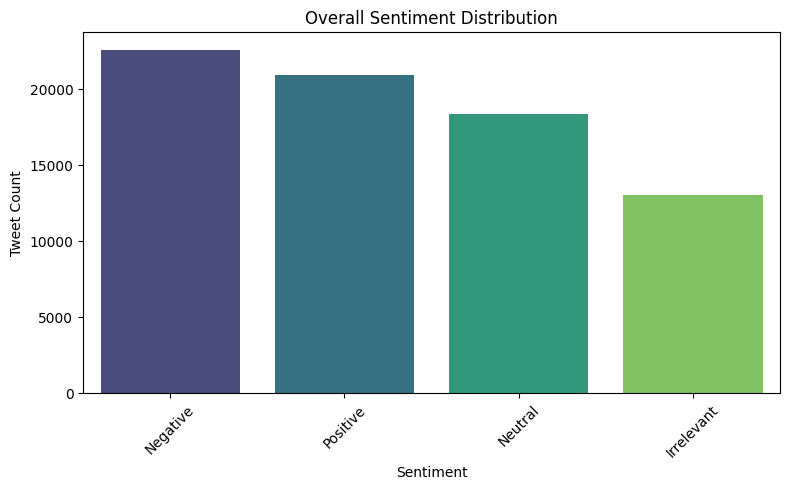

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


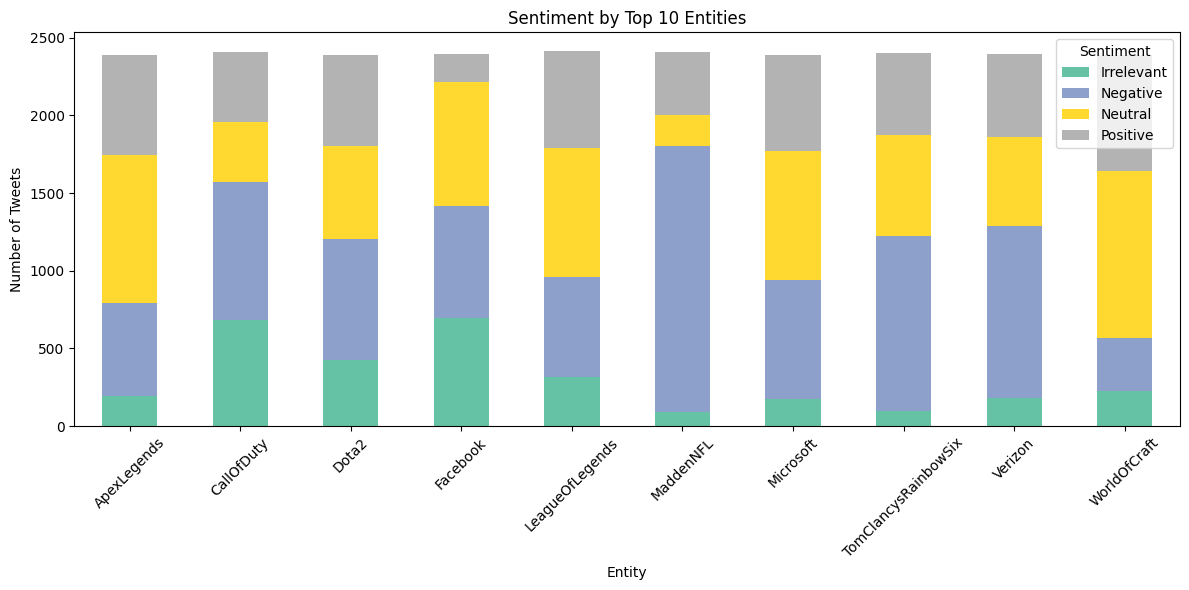

In [12]:
top_entities = df['Entity'].value_counts().head(10).index
df_top_entities = df[df['Entity'].isin(top_entities)]


entity_sentiment_counts = df_top_entities.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

entity_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Sentiment by Top 10 Entities')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
